In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model #Important


In [3]:
# Import the dataframe
df=pd.read_csv('/Users/richa/Desktop/python/machine_learning/datasource/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


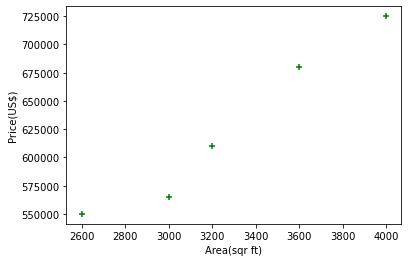

In [4]:
# Plot the dataframe through matplotlib
%matplotlib inline
plt.xlabel("Area(sqr ft)")
plt.ylabel("Price(US$)")
# Through plt.scatter function we have plotted the below graph according to data available in dataframe 
plt.scatter(df.area,df.price,color='green', marker='+')


In [6]:
# To define object of linear_model
reg=linear_model.LinearRegression()
# reg.fit(df) means we are traning our program to learn from given input and predict the price for other area
reg.fit(df[['area']],df.price)

# reg.fit(df[['area']],df.price), first input is array, here we have only one element i.e area,
# second is the output i.e price, reg.fit(df[['area']],df.price) this runs successfully means our function is ready to
# predict the price for any given area

LinearRegression()

In [7]:
# reg.predict(3300) was throughing below error
#ValueError: Expected 2D array, got 1D array instead:
#array=[3300].
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1)
#if it contains a single sample.
reg.predict(np.array(3300).reshape(-1, 1))

/Users/richa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [8]:
# How this value is predicted, y=mx+c
# through the given 5 x and y , system calculates the value of coefficient m and intercept b
# To get the coefficient value m we have reg.coef_
reg.coef_

array([135.78767123])

In [9]:
# To get the intercept value b we have reg.coef_
reg.intercept_

180616.43835616432

In [10]:
# Hence, for precicting any y we have the value of m, b , x and equation y=mx+c which is
y=135.78767123*3300+180616.43835616432
y
# this is how Y value for given x=3300 is predicted

628715.7534151643

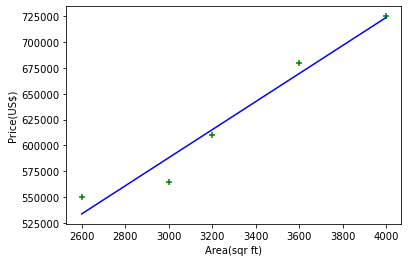

In [12]:
# Plot the dataframe through matplotlib
%matplotlib inline
plt.xlabel("Area(sqr ft)")
plt.ylabel("Price(US$)")
# Through plt.scatter function we have plotted the below graph according to data available in dataframe 
plt.scatter(df.area,df.price,color='green', marker='+')
plt.plot(df.area,reg.predict(df[['area']]), color='blue')

In [17]:
reg.predict(np.array(3000).reshape(-1, 1))

/Users/richa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [15]:
# To write the model into a file and then use that file for Prediction, two ways are possible
# 1. Pickle
# 2. Joblib
# first we will see Pickel
import pickle

In [25]:
# with open('pickle_model','wb') as f:
 #   pickle.dump(reg,f) it will create a model file
with open('pickle_model','wb') as f:
    pickle.dump(reg,f)

In [26]:
#with open('pickle_model','rb') as f :
#    mp = pickle.load(f) any machine learn from the model
with open('pickle_model','rb') as f :
    mp = pickle.load(f)

In [27]:
mp.predict(np.array(3000).reshape(-1, 1))

/Users/richa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [33]:
# 2. Joblib
import joblib

In [34]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [36]:
mj = joblib.load('model_joblib')

In [37]:
mj.predict(np.array(3000).reshape(-1, 1))

/Users/richa/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

In [38]:
mj.coef_

array([135.78767123])